In [1]:
# Magics
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Imports
import logging

import elfi
import lfire
import graphviz

import numpy as np
import matplotlib.pyplot as plt

from lfire.models import arch

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


 /usr/local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
 /usr/local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning:The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).


In [3]:
# Get logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [4]:
# Get the arch model
m = arch.get_model()

INFO:lfire.models.arch:true_params were not given. Now using [t1, t2] = [0.3, 0.7].


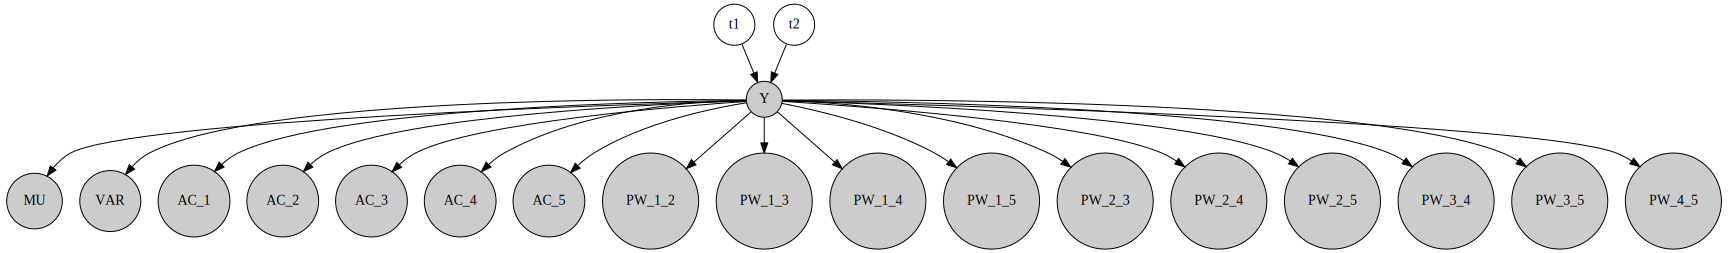

In [5]:
# Draw the model
elfi.draw(m)

In [6]:
# Create a grid for parameters
n = 25

t1 = np.linspace(-1, 1, n)
t2 = np.linspace(0, 1, n)

tt1, tt2 = np.meshgrid(t1, t2, indexing='ij')

params_grid = np.c_[tt1.flatten(), tt2.flatten()]

In [7]:
# LFIRE method
lfire_method = lfire.LFIRE(
    model=m,
    params_grid=params_grid,
    batch_size=500  # size of training data
)

INFO:lfire.methods.lfire:New marginal data (500 x 17) are generated.


In [8]:
# Run inference
%time lfire_res = lfire_method.infer()

Progress: |██████████████████████████████████████████████████| 100.0% Complete
CPU times: user 23min 56s, sys: 3min 44s, total: 27min 40s
Wall time: 10min 35s


In [9]:
# Get results keys
lfire_res.results.keys()

odict_keys(['n_sim', 'n_batches', 'posterior', 'lambda', 'coef', 'intercept', 't1', 't2'])

In [10]:
# Print summary
lfire_res.summary()

Method: LFIRE
Number of simulations: 312500
MAP estimates: t1: 0.167, t2: 0.792
Posterior means: t1: 0.124, t2: 0.876



In [11]:
# Print summary
print(lfire_res)

Method: LFIRE
Number of simulations: 312500
MAP estimates: t1: 0.167, t2: 0.792
Posterior means: t1: 0.124, t2: 0.876



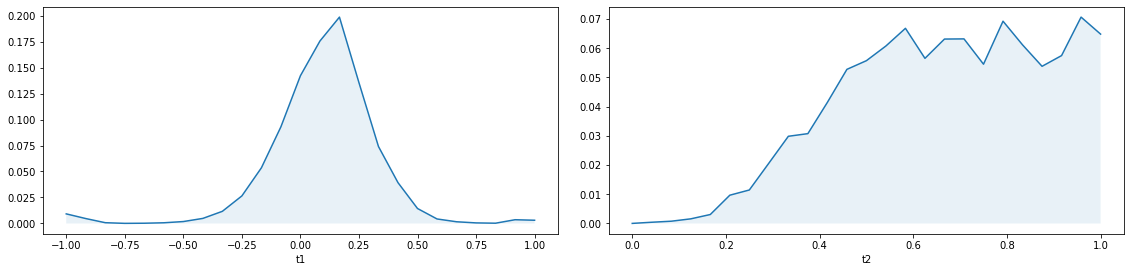

In [12]:
# Visualize marginals
lfire_res.plot_marginals();

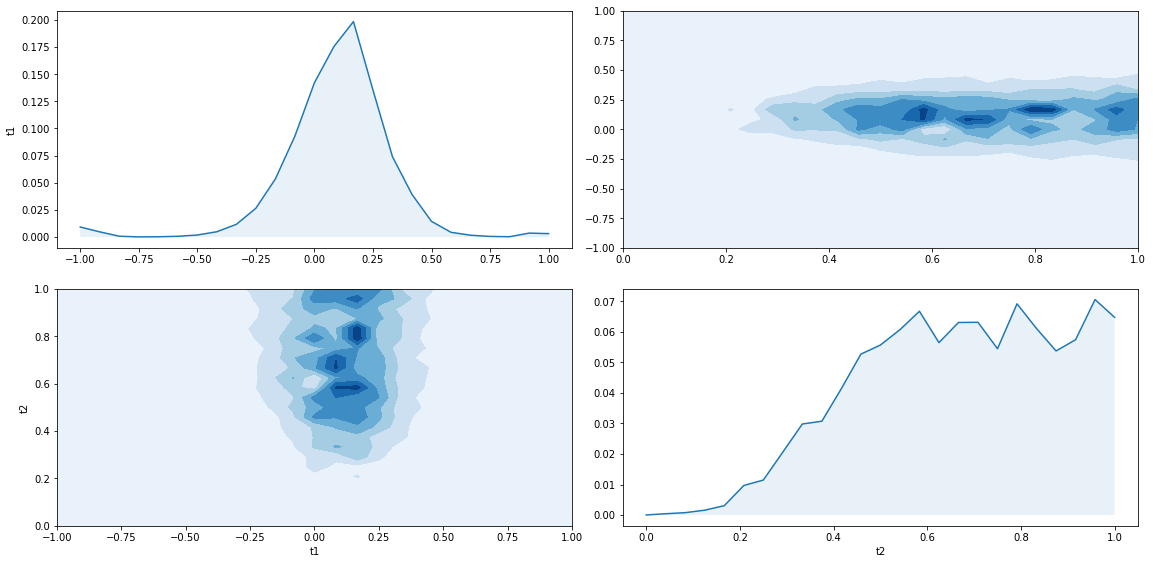

In [13]:
# Visualize pairs
lfire_res.plot_pairs();

In [14]:
# Get the arhc model with noisy summary statistics
m_noisy = arch.get_model(noise=17)

INFO:lfire.models.arch:true_params were not given. Now using [t1, t2] = [0.3, 0.7].


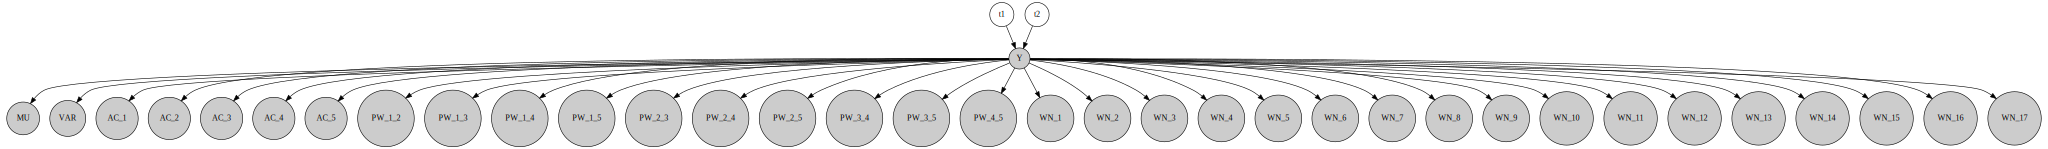

In [15]:
# Draw the model
elfi.draw(m_noisy)

In [16]:
# LFIRE method for noisy version
lfire_method_noisy = lfire.LFIRE(
    model=m_noisy,
    params_grid=params_grid,
    batch_size=500  # size of training data
)

INFO:lfire.methods.lfire:New marginal data (500 x 34) are generated.


In [17]:
# Run inference for noisy version
%time lfire_res_noisy = lfire_method_noisy.infer()

Progress: |██████████████████████████████████████████████████| 100.0% Complete
CPU times: user 38min 48s, sys: 2min 25s, total: 41min 14s
Wall time: 13min


In [18]:
# Get results keys
lfire_res_noisy.results.keys()

odict_keys(['n_sim', 'n_batches', 'posterior', 'lambda', 'coef', 'intercept', 't1', 't2'])

In [19]:
# Print summary
lfire_res_noisy.summary()

Method: LFIRE
Number of simulations: 312500
MAP estimates: t1: 0.333, t2: 0.375
Posterior means: t1: 0.343, t2: 0.657



In [20]:
# Print summary
print(lfire_res_noisy)

Method: LFIRE
Number of simulations: 312500
MAP estimates: t1: 0.333, t2: 0.375
Posterior means: t1: 0.343, t2: 0.657



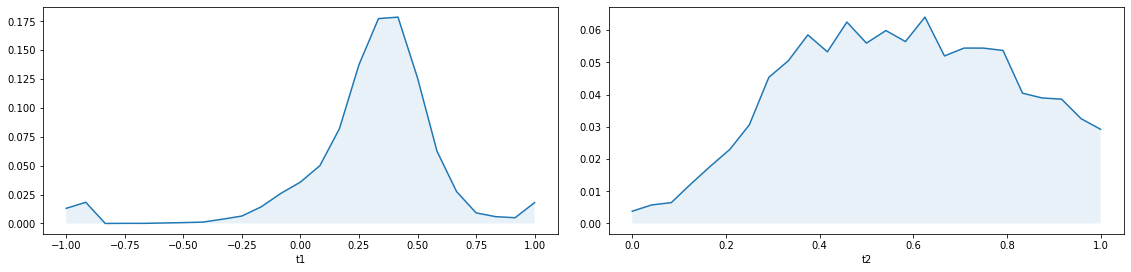

In [21]:
# Visualize marginals
lfire_res_noisy.plot_marginals();

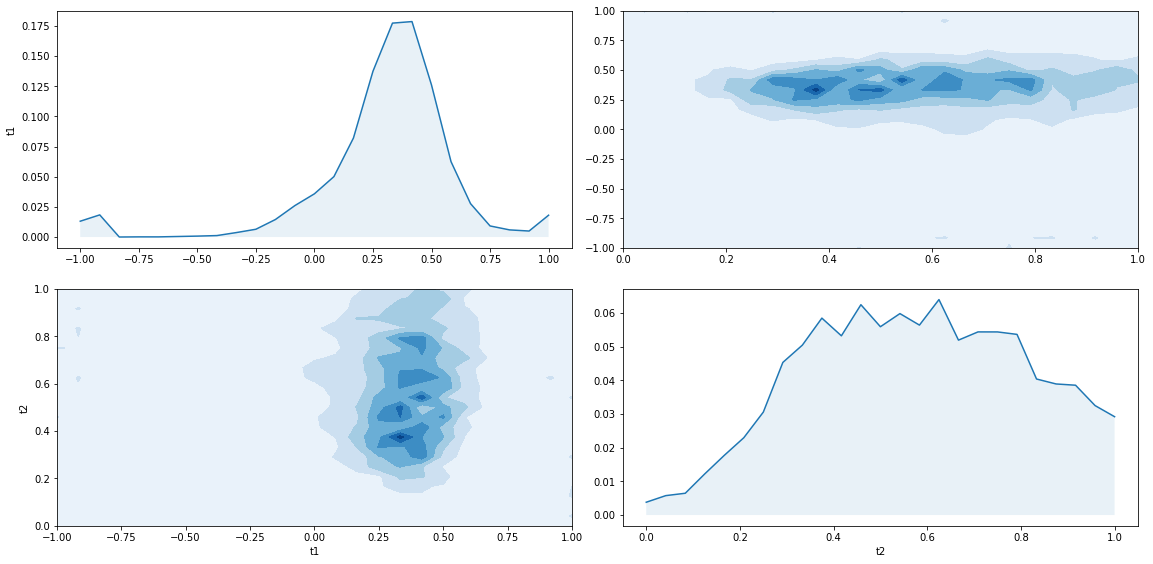

In [22]:
# Visualize pairs
lfire_res_noisy.plot_pairs();